Frequency bias correction of CHAZ TC wind fields

In [9]:
import sys
import numpy as np
import netCDF4 as nc
from scipy.interpolate import griddata
from shapely.geometry import Polygon, Point

from climada.util.constants import SYSTEM_DIR
from climada.hazard import TropCyclone

In [10]:
# Define EP–NA boundary
EP_NA_BOUNDARY_LINE = [
    (-100.0, 60.0),
    (-100.0, 18.0),
    (-90.0, 18.0),
    (-90.0, 15.0),
    (-85.0, 15.0),
    (-85.0, 9.0),
    (-75.0, 9.0),
    (-75.0, 5.0)
]

# Define constants
YRLY_FREQ_IB_LIT = {
    'EP': 14.5, 'NA': 10.8, 'NI': 2.0,
    'SI': 12.3, 'SP': 9.3, 'WP': 22.5
}

BASIN_BOUNDARIES = {
    'EP': Polygon([(-180, 60), (-180, 5)] + EP_NA_BOUNDARY_LINE[::-1]),
    'NA': Polygon(EP_NA_BOUNDARY_LINE + [(0, 5), (0, 60)]),
    'NI': (30.0, 100.0, 5.0, 60.0),
    'SI': (10.0, 135.0, -60.0, -5.0),
    'SP': (135.0, 240.0, -60.0, -5.0),
    'WP': (100.0, 180.0, 5.0, 60.0)
}

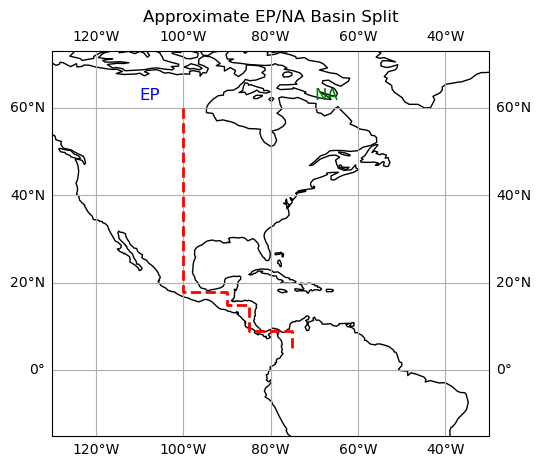

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Boundary polyline
boundary_line = [
    (-100.0, 60.0),
    (-100.0, 18.0),
    (-90.0, 18.0),
    (-90.0, 15.0),
    (-85.0, 15.0),
    (-85.0, 9.0),
    (-75.0, 9.0),
    (-75.0, 5.0)
]

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -30, -10, 65])
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot polyline
lons, lats = zip(*boundary_line)
ax.plot(lons, lats, color='red', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())
ax.text(-110, 62, "EP", fontsize=12, color="blue")
ax.text(-70, 62, "NA", fontsize=12, color="green")

plt.title("Approximate EP/NA Basin Split")
plt.show()


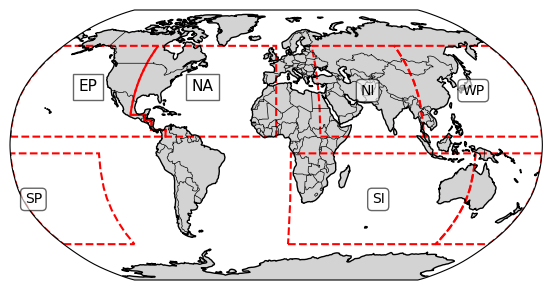

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Custom EP–NA boundary line
EP_NA_BOUNDARY_LINE = [
    (-100.0, 60.0),
    (-100.0, 18.0),
    (-90.0, 18.0),
    (-90.0, 15.0),
    (-85.0, 15.0),
    (-85.0, 9.0),
    (-75.0, 9.0),
    (-75.0, 5.0)
]

# Close polygons using stepped line as shared edge
ep_coords = [(-180, 60), (-180, 5)] + EP_NA_BOUNDARY_LINE[::-1]  # reversed
na_coords = EP_NA_BOUNDARY_LINE + [(0, 5), (0, 60)]

# Rectangular basins
RECTANGULAR_BASINS = {
    'NI': [30.0, 100.0, 5.0, 60.0],
    'SI': [10.0, 135.0, -60.0, -5.0],
    'SP': [135.0, 240.0, -60.0, -5.0],
    'WP': [100.0, 180.0, 5.0, 60.0]
}

# Plotting
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add EP and NA as polygons
ep_patch = mpatches.Polygon(
    ep_coords,
    closed=True,
    edgecolor='red',
    facecolor='none',
    linewidth=1.5,
    linestyle='dashed',
    transform=ccrs.PlateCarree()
)
na_patch = mpatches.Polygon(
    na_coords,
    closed=True,
    edgecolor='red',
    facecolor='none',
    linewidth=1.5,
    linestyle='dashed',
    transform=ccrs.PlateCarree()
)
ax.add_patch(ep_patch)
ax.add_patch(na_patch)

# Label EP and NA
ax.text(-140, 32, 'EP', transform=ccrs.PlateCarree(), fontsize=11, bbox=dict(facecolor='white', alpha=0.6))
ax.text(-60, 32, 'NA', transform=ccrs.PlateCarree(), fontsize=11, bbox=dict(facecolor='white', alpha=0.6))

# Add rectangular basins
for name, (lonmin, lonmax, latmin, latmax) in RECTANGULAR_BASINS.items():
    width = lonmax - lonmin
    height = latmax - latmin

    rect = mpatches.Rectangle(
        (lonmin, latmin), width, height,
        transform=ccrs.PlateCarree(),
        edgecolor='red',
        facecolor='none',
        linestyle='dashed',
        linewidth=1.5
    )
    ax.add_patch(rect)

    ax.text(lonmin + width / 2, latmin + height / 2, name, transform=ccrs.PlateCarree(),
            ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.6, boxstyle='round'))

plt.tight_layout()
plt.show()


In [22]:
haz_in = SYSTEM_DIR/"hazard"/"future"/"CHAZ_update"

basin = 'NA'
model = 'MIROC6'
period = 'base'
scenario = 'ssp370'
cat = 'CRH'
wind = 'H08'

file = f'TC_{basin}_0300as_CHAZ_{model}_{period}_{scenario}_80ens_{cat}_{wind}.hdf5'
tc_hazard = TropCyclone.from_hdf5(haz_in / file)

<GeoAxes: title={'center': 'TC max intensity at each point'}>

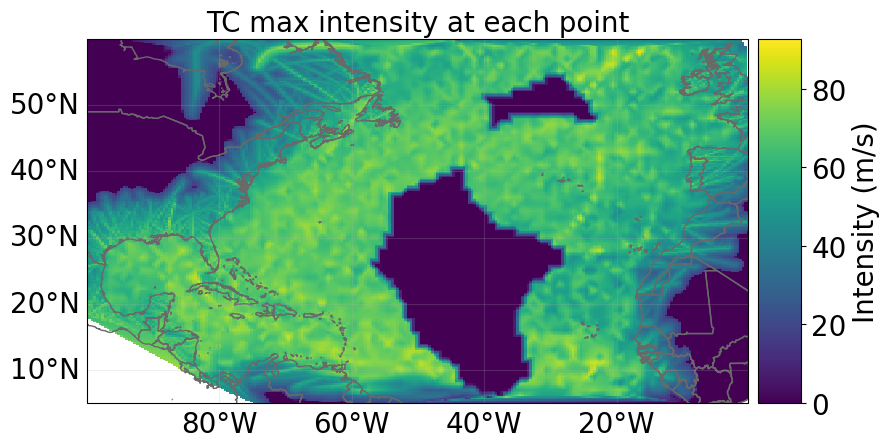

In [23]:
tc_hazard.plot_intensity(event=0)

In [25]:
tc_hazard.frequency

array([0.00052348, 0.00052348, 0.00052348, ..., 0.00052348, 0.00052348,
       0.00052348])